# Problem Statement
You are working as a car saleman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes:
1. Customer Name
2. Customer e-mail
3. Country
4. Gender
5. Age
6. Annual Salary
7. Credit Card Dept
8. Net Worth

The model should predict : Car Purchase Amount

# Import Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [71]:
tf.__version__

'2.3.1'

In [72]:
df = pd.read_csv('Car_Purchasing_Data.csv', encoding = "ISO-8859-1")
df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [73]:
df.Country.unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'S

1    253
0    247
Name: Gender, dtype: int64


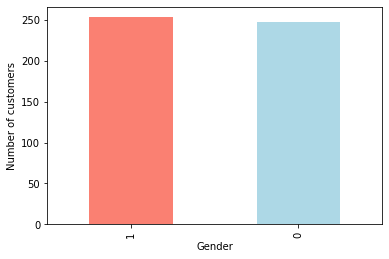

In [74]:
df.Gender.value_counts().plot(kind = 'bar',color = ['salmon','lightblue'])
print(df.Gender.value_counts())
plt.xlabel('Gender')
plt.ylabel('Number of customers')
plt.show()

In [75]:
df.drop(['Customer Name','Customer e-mail','Country'],axis = 1,inplace = True)

In [76]:
df

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [77]:
X = df.drop('Car Purchase Amount',axis = 1)
y = df['Car Purchase Amount']

In [78]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
y_train = y_train.values.reshape(-1,1)
y_train = sc.fit_transform(y_train)

In [132]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 8,input_dim = 5,activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1))

In [133]:
ann.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 9         
Total params: 345
Trainable params: 345
Non-trainable params: 0
________________________________________________________

In [134]:
ann.compile(optimizer='adam',
           loss = 'mean_squared_error')

In [135]:
epochs_hist = ann.fit(X_train,y_train,batch_size=32,epochs=100,verbose = 1,validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 1s 51ms/step - loss: 3019766528.0000 - val_loss: 2740305408.0000
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 2312268288.0000 - val_loss: 2218309376.0000
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 1991440768.0000 - val_loss: 2055503488.0000
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 1869482624.0000 - val_loss: 1946247936.0000
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 1770445568.0000 - val_loss: 1841216768.0000
Epoch 6/100
10/10 [==============================] - 0s 13ms/step - loss: 1666227456.0000 - val_loss: 1728958464.0000
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 1548107520.0000 - val_loss: 1588398848.0000
Epoch 8/100
10/10 [==============================] - 0s 10ms/step - loss: 1394940160.0000 - val_loss: 1405026048.0000
Epoch 9/100
10/10 [==============================] - 0s 

10/10 [==============================] - 0s 11ms/step - loss: 46591568.0000 - val_loss: 49974024.0000
Epoch 72/100
10/10 [==============================] - 0s 10ms/step - loss: 46735872.0000 - val_loss: 50445272.0000
Epoch 73/100
10/10 [==============================] - 0s 9ms/step - loss: 48159320.0000 - val_loss: 50252376.0000
Epoch 74/100
10/10 [==============================] - 0s 10ms/step - loss: 46031796.0000 - val_loss: 50018044.0000
Epoch 75/100
10/10 [==============================] - 0s 10ms/step - loss: 46777864.0000 - val_loss: 49870684.0000
Epoch 76/100
10/10 [==============================] - 0s 10ms/step - loss: 46275712.0000 - val_loss: 49685576.0000
Epoch 77/100
10/10 [==============================] - 0s 10ms/step - loss: 46214216.0000 - val_loss: 49884344.0000
Epoch 78/100
10/10 [==============================] - 0s 10ms/step - loss: 46395960.0000 - val_loss: 50113712.0000
Epoch 79/100
10/10 [==============================] - 0s 10ms/step - loss: 47541932.0000 - val

In [136]:
y_pred = ann.predict(X_test)
final = pd.DataFrame({'Actual':y_test,'Predicted':y_pred.flatten()})

In [137]:
final

,Actual,Predicted
90,38955.21919,37857.273438
254,43401.56612,44820.878906
283,29417.64694,35205.910156
445,52150.41786,49358.226562
461,38243.06228,42885.699219
...,...,...
372,38545.80328,48617.691406
56,47380.91224,57796.703125
440,41147.46679,45185.136719
60,37348.13737,44481.855469


In [138]:
from sklearn.metrics import r2_score,mean_squared_error
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
print(R2)
print(MSE)

0.6264729599897174
44988872.20872738


In [139]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

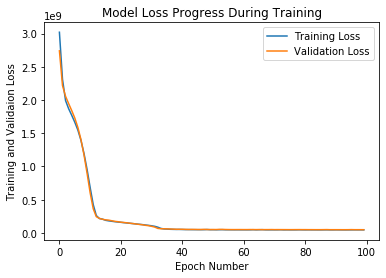

In [140]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validaion Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss','Validation Loss'])
plt.show()

In [141]:
test = np.array([[1,50,50000,10000,600000]])
prediction = ann.predict(test)

In [142]:
print(prediction)

[[44409.168]]


In [143]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200,random_state = 42)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [144]:
y_pred = regressor.predict(X_test)
final = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [145]:
final

,Actual,Predicted
90,38955.21919,40256.063713
254,43401.56612,43085.050800
283,29417.64694,30793.167246
445,52150.41786,50773.445425
461,38243.06228,38163.866478
...,...,...
372,38545.80328,40208.182238
56,47380.91224,47119.225008
440,41147.46679,42139.288673
60,37348.13737,34716.953797


In [146]:
from sklearn.metrics import r2_score,mean_squared_error
R2 = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
print(R2)
print(MSE)

0.9509428752096803
5908607.628670003


In [147]:
test = np.array([[1,50,50000,10000,600000]])
prediction = regressor.predict(test)
print(prediction)

[46720.8963424]


In [148]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor,X = X_train,y = y_train,cv = 10)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 93.18 %
Standard Deviation : 3.00 %
